In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()


Saving data.csv to data.csv


In [2]:
df = pd.read_csv(list(uploaded.keys())[0])
df


,Fund,P1,P2,P3,P4
0,M1,1,2,3,4
1,M2,2,3,4,5
2,M3,3,4,5,6


In [3]:
weights = [1,1,1,1]
impacts = ['+','+','+','+']
data = df.iloc[:,1:].astype(float)


In [4]:
norm = np.sqrt((data**2).sum())
norm_data = data / norm
norm_data


,P1,P2,P3,P4
0,0.267261,0.371391,0.424264,0.455842
1,0.534522,0.557086,0.565685,0.569803
2,0.801784,0.742781,0.707107,0.683763


In [5]:
weighted = norm_data * weights
weighted


,P1,P2,P3,P4
0,0.267261,0.371391,0.424264,0.455842
1,0.534522,0.557086,0.565685,0.569803
2,0.801784,0.742781,0.707107,0.683763


In [6]:
best=[]
worst=[]

for i in range(len(impacts)):
    if impacts[i]=='+':
        best.append(weighted.iloc[:,i].max())
        worst.append(weighted.iloc[:,i].min())
    else:
        best.append(weighted.iloc[:,i].min())
        worst.append(weighted.iloc[:,i].max())

best, worst


([0.8017837257372732,
  0.7427813527082074,
  0.7071067811865475,
  0.6837634587578276],
 [0.2672612419124244,
  0.3713906763541037,
  0.4242640687119285,
  0.4558423058385518])

In [7]:
d_best = np.sqrt(((weighted - best)**2).sum(axis=1))
d_worst = np.sqrt(((weighted - worst)**2).sum(axis=1))


In [8]:
score = d_worst / (d_best + d_worst)
df['Topsis Score'] = score
df['Rank'] = df['Topsis Score'].rank(ascending=False).astype(int)
df


,Fund,P1,P2,P3,P4,Topsis Score,Rank
0,M1,1,2,3,4,0.0,3
1,M2,2,3,4,5,0.5,2
2,M3,3,4,5,6,1.0,1


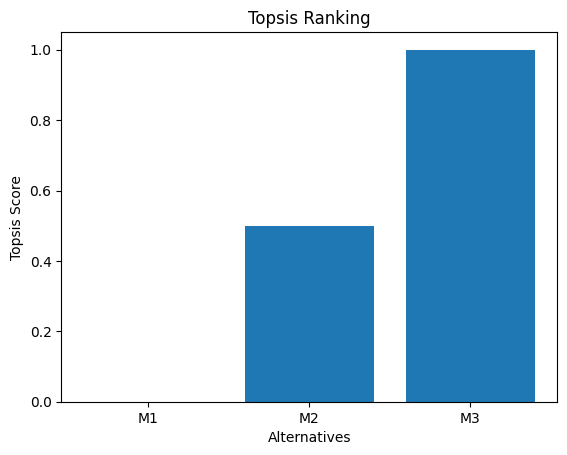

In [9]:
plt.bar(df.iloc[:,0], df['Topsis Score'])
plt.xlabel("Alternatives")
plt.ylabel("Topsis Score")
plt.title("Topsis Ranking")
plt.show()
